In [85]:
#importing required model for preprocessing and building the neural network 
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline

from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
import tensorflow as tf

In [8]:
#Open the file in read mode
data=h5py.File("Downloads/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5",'r')

In [7]:
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [9]:
#let us Load the training, testing, and validation data
X_train=data['X_train']
X_test=data['X_test']
X_val=data['X_val']
y_train=data['y_train']
y_test=data['y_test']
y_val=data['y_val']

In [10]:
# Print the shape and data type of training, testing, and validation data
print("Training data X-- Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Testing data X-- Shape :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Validation data X-- Shape :", X_val.shape,"and Data Type : ", X_val.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)
print("Validation data y-- Shape :", y_val.shape,"and Data Type : ", y_val.dtype)

Training data X-- Shape : (42000, 32, 32) and Data Type :  float32
Testing data X-- Shape : (18000, 32, 32) and Data Type :  float32
Validation data X-- Shape : (60000, 32, 32) and Data Type :  float32
Training data y-- Shape : (42000,) and Data Type :  uint8
Testing data y-- Shape : (18000,) and Data Type :  uint8
Validation data y-- Shape : (60000,) and Data Type :  uint8


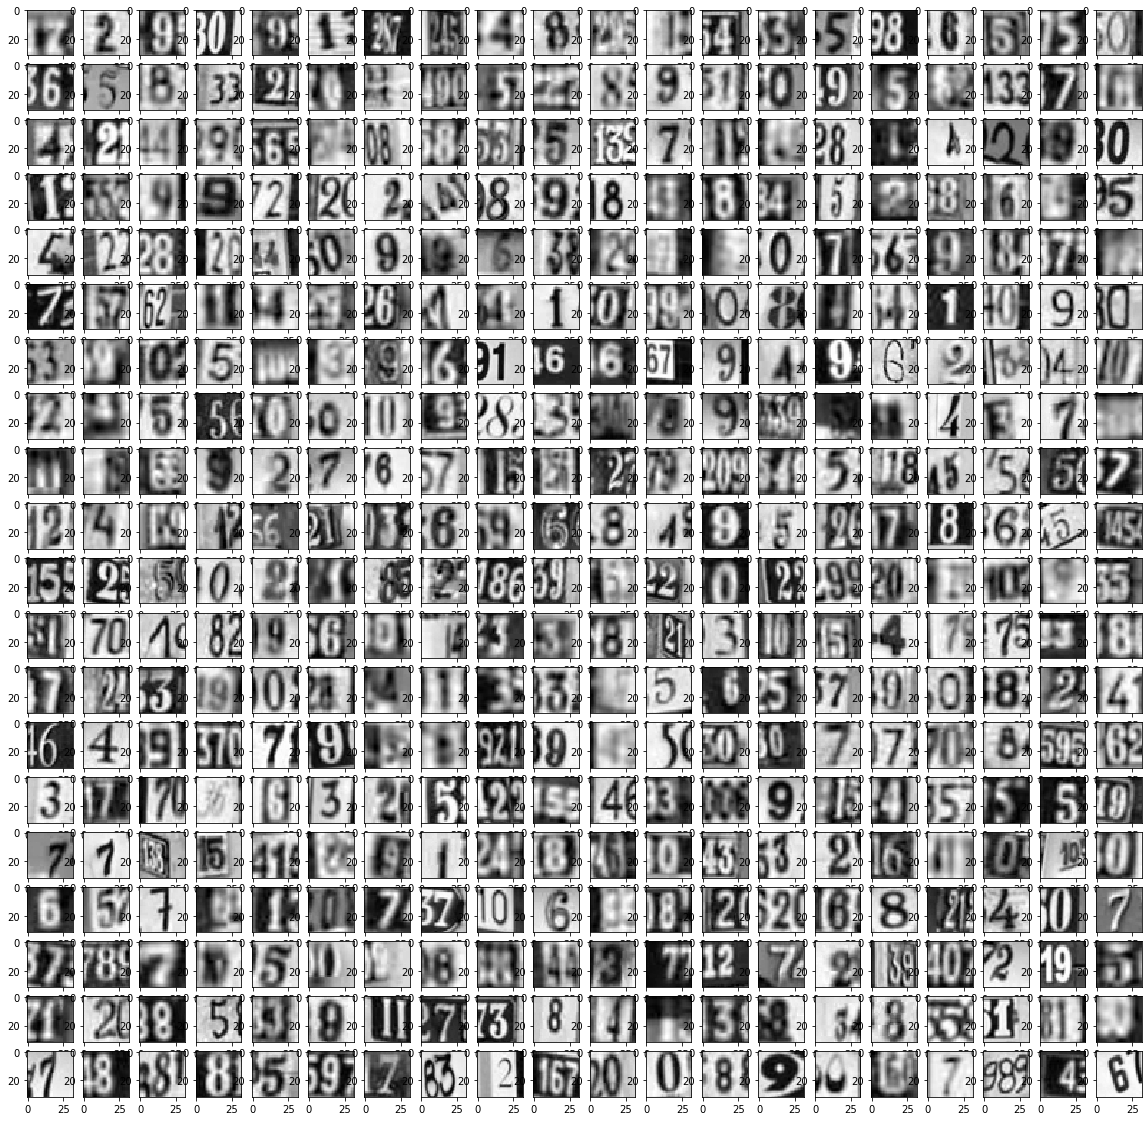

In [22]:
#visualization the data
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20,20))

columns=20
rows=20
for i in range(1, columns*rows+1):
    img=X_test[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

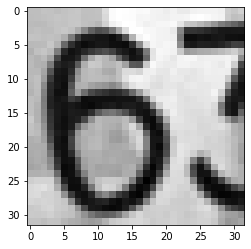

Label:  2


In [25]:
# show the number in the dataset
plt.imshow(X_train[1],cmap='gray')    
plt.show()
print('Label: ', y_train[0])

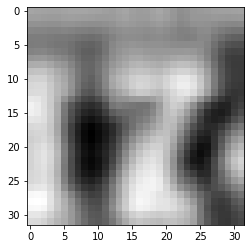

Label:  1


In [26]:
# show the number in the dataset
plt.imshow(X_test[1],cmap='gray')    
plt.show()
print('Label: ', y_test[0])

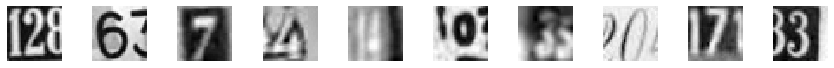

label for each of the above image: [2 6 7 4 4 0 3 0 7 3 1 0 1 3 1 1 0 0 8 4]


In [28]:
# visualizing the first 20 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:20]))

In [29]:
 # Implementing Deep Neural Network

In [31]:
#let us do eshape data from 2D to 1D with resolution 32X32 to 1024
import numpy as np
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

In [33]:
#Converting output label to multiple values
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


In [35]:
#Initialize the ANN block 
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
keras_model = Sequential()

Using TensorFlow backend.


In [36]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model.add(Activation('softmax'))

In [37]:
keras_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
__________

In [38]:
# compiling the ANN using adam optimizer
keras_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 100, epochs = 20, verbose = 1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 10s 235us/step - loss: 14.5075 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/20
42000/42000 [==============================] - 9s 210us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/20
42000/42000 [==============================] - 14s 322us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/20
42000/42000 [==============================] - 13s 315us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/20
42000/42000 [==============================] - 14s 323us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/20
42000/42000 [==============================] - 14s 324us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/2

In [39]:
#after 20 epoch we can still see that accuracy can't be improved, so let us try with sgd optimizer 

# using sdg optimizer 
keras_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 250, epochs = 20, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 5s 112us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/20
42000/42000 [==============================] - 4s 97us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/20
42000/42000 [==============================] - 4s 97us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/20
42000/42000 [==============================] - 8s 189us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/20
42000/42000 [==============================] - 8s 192us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/20
42000/42000 [==============================] - 8s 191us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/20
42000/42000 [==============================] - 8s 188us/step - loss: 14.5094 - acc: 0.0998 - val_loss

In [40]:
#as we can observe the accuracy using both adam and sdg optimizer the accuracy is not improving 
#to improve the accuracy we can either change or tune the hyperparameters such as learning rate and echos and batch size 

In [41]:
#now let us change learning rate and using adam optimizers
adam = optimizers.adam(lr = 0.0001)
keras_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 250, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 134us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
42000/42000 [==============================] - 5s 112us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
42000/42000 [==============================] - 5s 125us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
42000/42000 [==============================] - 9s 223us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
42000/42000 [==============================] - 9s 211us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
42000/42000 [==============================] - 9s 214us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
42000/42000 [==============================] - 9s 208us/step - loss: 14.5094 - acc: 0.0998 -

In [42]:
#let us see with sgd optimizers and with learning rate 0.0001
sgd = optimizers.sgd(lr = 0.0001)
keras_model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 5s 121us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
42000/42000 [==============================] - 8s 193us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
42000/42000 [==============================] - 9s 212us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
42000/42000 [==============================] - 9s 206us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
42000/42000 [==============================] - 8s 196us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
42000/42000 [==============================] - 8s 195us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
42000/42000 [==============================] - 8s 195us/step - loss: 14.5094 - acc: 0.0998 -

In [43]:
#as we can see still the accuracy is not improving even after try it for 100 epochs and changing learning rate 
#now let us try with changing learning rate again form 0.0001->to 0.00001

adam = optimizers.adam(lr = 0.00001)

keras_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 50, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 6s 148us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
42000/42000 [==============================] - 5s 126us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
42000/42000 [==============================] - 8s 182us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
42000/42000 [==============================] - 10s 231us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
42000/42000 [==============================] - 9s 224us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
42000/42000 [==============================] - 10s 227us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000 0.09 - ETA: 1s - loss:
Epoch 7/50
42000/42000 [==============================] - 9s 224us/step - loss: 14.50

In [45]:
#now let us changes the epoch value to 50 to 100

adam = optimizers.adam(lr = 0.00001)

keras_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 154us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
42000/42000 [==============================] - 5s 128us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
42000/42000 [==============================] - 9s 204us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
42000/42000 [==============================] - 10s 234us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
42000/42000 [==============================] - 10s 231us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
42000/42000 [==============================] - 9s 219us/step - loss: 14.5094 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
42000/42000 [==============================] - 9s 225us/step - loss: 14.5094 - acc: 0.0998

In [54]:
results = keras_model.evaluate(X_val, y_val)
print('Val_acc using simple NN adam : ', results[1])

60000/60000 [==============================] - 7s 114us/step
Val_acc using simple NN adam :  0.1


In [68]:
import pandas as pd
results_on_val = pd.DataFrame({'Method':['ANN'], 'accuracy': results[1]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,ANN,0.1


In [51]:
# as we can see that from above after changing the learning rate still the accuracy of the model is not changing and accuracy is to poor 
#hence let us try building the model by introducing the batch normaization and dropout method 

In [46]:
#let us try to implementing the model by adding batch normization and the using adam optimizer 
keras_model_1 = Sequential()

# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_1.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_1.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_1.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_1.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_1.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_1.add(Activation('softmax'))

In [47]:
keras_model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
__________

In [48]:
#using learning rate 0.0001
adam = optimizers.adam(lr = 0.0001)

keras_model_1.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [49]:
# Fitting the model with Training datasets
history_1 = keras_model_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 17s 399us/step - loss: 2.0911 - acc: 0.2705 - val_loss: 1.9500 - val_acc: 0.3238
Epoch 2/100
42000/42000 [==============================] - 9s 216us/step - loss: 1.5743 - acc: 0.5181 - val_loss: 1.6202 - val_acc: 0.4924
Epoch 3/100
42000/42000 [==============================] - 9s 215us/step - loss: 1.2943 - acc: 0.6366 - val_loss: 1.3273 - val_acc: 0.6212
Epoch 4/100
42000/42000 [==============================] - 9s 216us/step - loss: 1.0994 - acc: 0.6963 - val_loss: 1.1565 - val_acc: 0.6698
Epoch 5/100
42000/42000 [==============================] - 9s 215us/step - loss: 0.9617 - acc: 0.7322 - val_loss: 1.0731 - val_acc: 0.6859
Epoch 6/100
42000/42000 [==============================] - 9s 217us/step - loss: 0.8555 - acc: 0.7591 - val_loss: 1.0800 - val_acc: 0.6769
Epoch 7/100
42000/42000 [==============================] - 9s 214us/step - loss: 0.7732 - acc: 0.7809 - val_loss: 1

In [50]:
# as we can see using batch normaization we can see val accuracy is improving but at the time we can see model is going to the overfit
#now let try to over come by using dropout method and using batch normalization 

In [53]:
results_1 = keras_model_1.evaluate(X_val, y_val)
print('Val_acc using Batch and adam : ', results_1[1])

60000/60000 [==============================] - 12s 196us/step
Val_acc using Batch and adam :  0.8407666666666667


In [55]:
#let us implement using the batch normization and the dropout methods 

keras_model_3 = Sequential()

# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_3.add(Dense(256,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_3.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_3.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_3.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_3.add(Activation('softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [56]:
keras_model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
__________

In [57]:
adam = optimizers.adam(lr = 0.00001)
keras_model_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_3 = keras_model_3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 30s 722us/step - loss: 2.8454 - acc: 0.1002 - val_loss: 2.3492 - val_acc: 0.1043
Epoch 2/100
42000/42000 [==============================] - 17s 414us/step - loss: 2.8302 - acc: 0.1020 - val_loss: 2.3425 - val_acc: 0.1040
Epoch 3/100
42000/42000 [==============================] - 18s 420us/step - loss: 2.8108 - acc: 0.1010 - val_loss: 2.3396 - val_acc: 0.1083
Epoch 4/100
42000/42000 [==============================] - 17s 417us/step - loss: 2.7888 - acc: 0.0996 - val_loss: 2.3392 - val_acc: 0.1084
Epoch 5/100
42000/42000 [==============================] - 18s 419us/step - loss: 2.7732 - acc: 0.1001 - val_loss: 2.3341 - val_acc: 0.1097
Epoch 6/100
42000/42000 [==============================] - 18s 420us/step - loss: 2.7461 - acc: 0.1039 - val_loss: 2.3322 - val_acc: 0.1085
Epoch 7/100
42000/42000 [==============================] - 17s 412us/step - loss: 2.7323 - acc: 0.1020 - val_l

In [58]:
#as we can see from the above the val accuracy is improving but we kept learning rate very less value it takes more training time to converge 
#hence let of try varying learning rate and implement the model

In [60]:
#let us implement using the batch normization and the dropout methods 

keras_model_3 = Sequential()

# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_3.add(Dense(256,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_3.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_3.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_3.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_3.add(Activation('softmax'))

In [62]:
keras_model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
activation_19 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
activation_20 (Activation)   (None, 256)               0         
__________

In [63]:
adam = optimizers.adam(lr = 0.0001)
keras_model_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_3 = keras_model_3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 36s 866us/step - loss: 2.8465 - acc: 0.1030 - val_loss: 2.3156 - val_acc: 0.1125
Epoch 2/100
42000/42000 [==============================] - 34s 811us/step - loss: 2.7137 - acc: 0.1020 - val_loss: 2.3167 - val_acc: 0.1179
Epoch 3/100
42000/42000 [==============================] - 41s 980us/step - loss: 2.6284 - acc: 0.0987 - val_loss: 2.3068 - val_acc: 0.1194
Epoch 4/100
42000/42000 [==============================] - 42s 1ms/step - loss: 2.5501 - acc: 0.1046 - val_loss: 2.2998 - val_acc: 0.1216
Epoch 5/100
42000/42000 [==============================] - 41s 986us/step - loss: 2.5042 - acc: 0.1045 - val_loss: 2.2937 - val_acc: 0.1371
Epoch 6/100
42000/42000 [==============================] - 44s 1ms/step - loss: 2.4669 - acc: 0.1048 - val_loss: 2.2915 - val_acc: 0.1268
Epoch 7/100
42000/42000 [==============================] - 42s 995us/step - loss: 2.4359 - acc: 0.1027 - val_loss:

In [65]:
results_3 = keras_model_3.evaluate(X_val, y_val)
print('Val_acc using BatchNorm and Dropout adam : ', results_3[1])

60000/60000 [==============================] - 58s 974us/step
Val_acc using BatchNorm and Dropout adam :  0.69545


In [77]:
#from observation we can able to see as we change the hyperparameter for the model the accuracy is improving 
#hence the model able to learn better 
#the accuracy for 3 different hyperparameters
#Val_acc using simple NN adam :  0.1
#Val_acc using Batch and adam :  0.8407666666666667
#Val_acc using BatchNorm and Dropout adam :  0.69545

#the model can able to predict well with using learning rate of 0.0001 with the batch normalization.

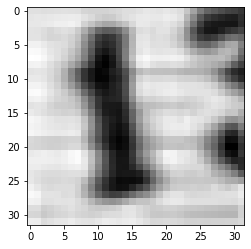

In [78]:
#testing the ANN
#Showing the image
plt.imshow(X_test[6].reshape(32,32),cmap='gray')

In [79]:

#Predicting the digits
keras_model_1.predict_classes(X_test)[6]

1

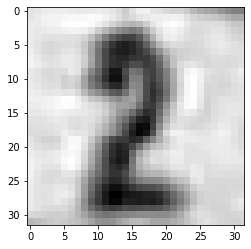

In [81]:
#Showing the image
plt.imshow(X_test[2].reshape(32,32),cmap='gray')

In [83]:
#Predicting the digits
keras_model_3.predict_classes(X_test)[2]

2

In [84]:
#conclusion 

#the model accuracy can be improved by tuning the hyper parameter and using regularization techniques. 
#the accuracy for 3 different hyperparameters
#Val_acc using simple NN adam :  0.1
#Val_acc using Batch and adam :  0.8407666666666667
#Val_acc using BatchNorm and Dropout adam :  0.69545
